# GOAL: PREDICT STAR TYPES

-----------------------------------------------------------------------------------------------------------------------------------------------------------

>### Read data into a DataFrame and rename a few columns


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

data = pd.read_csv('stars.csv');data
new_columns_names = {'L': 'Relative_Luminosity', 'R': 'Relative_Radius', 'A_M': 'Absolute_Magnitude' , 'Type' :'Target'}
data = data.rename(columns=new_columns_names); data 

,Temperature,Relative_Luminosity,Relative_Radius,Absolute_Magnitude,Color,Spectral_Class,Target
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


##### RESULT : stars.csv data, contains 240 rows and contains 7 columns

-----------------------------------------------------------------------------------------------------------------------------------------------------------

>### First Information 


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Relative_Luminosity,240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Relative_Radius,240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute_Magnitude,240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Target (star types),240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


># value_counts

In [8]:
data.Temperature.value_counts()

3600     3
2935     2
3324     2
3625     2
2600     2
        ..
15680    1
16787    1
3752     1
2871     1
17920    1
Name: Temperature, Length: 228, dtype: int64

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

># graph

Temperature            228
Relative_Luminosity    208
Relative_Radius        216
Absolute_Magnitude     228
Color                   17
Spectral_Class           7
Target (star types)      6
dtype: int64


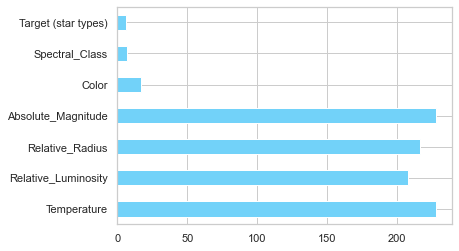

In [6]:
data.nunique().plot(kind='barh',color='#72d2f9')
print(data.nunique())
c_features = ['Temperature' , 'Relative_Luminosity' , 'Relative_Radius' , 'Absolute_Magnitude' ]
n_features = ['Color' , 'Spectral_Class' ]

In [24]:
data

,Temperature,Relative_Luminosity,Relative_Radius,Absolute_Magnitude,Color,Spectral_Class,Target
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


<AxesSubplot:xlabel='Temperature', ylabel='Count'>

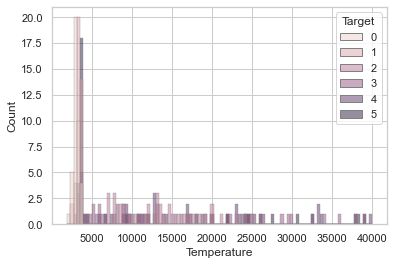

In [27]:
sns.histplot(data= data , x= 'Temperature' , bins=100 , edgecolor='gray',hue='Target')

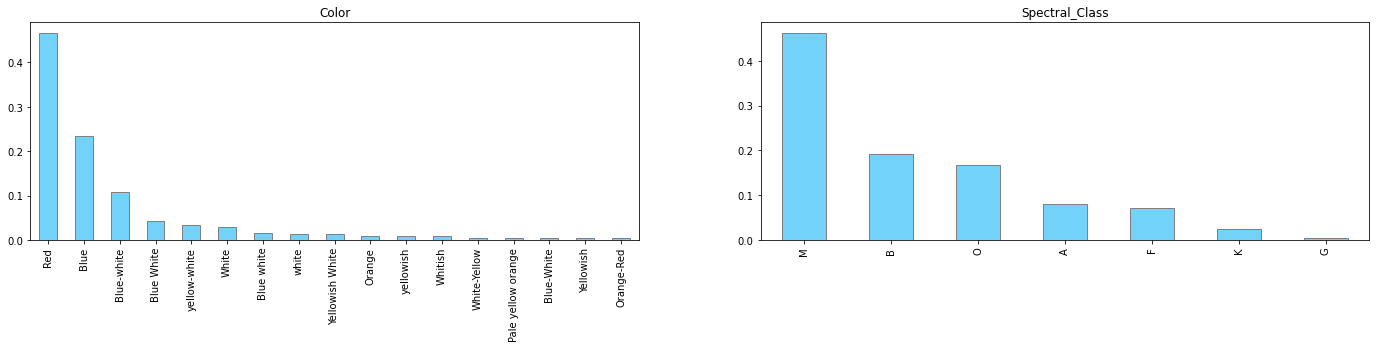

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(24, 4))
for i, c in enumerate(n_features):
     data[c].value_counts(normalize=True).plot(kind = 'bar',color=['#72d2f9'], ax=axes[i], title = c, fontsize=10 ,edgecolor='gray')

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\ProgramData\Anaconda3\lib\si

[<AxesSubplot:xlabel='Temperature'>,
 <AxesSubplot:xlabel='Relative_Luminosity'>,
 <AxesSubplot:xlabel='Relative_Radius'>,
 <AxesSubplot:xlabel='Absolute_Magnitude'>]

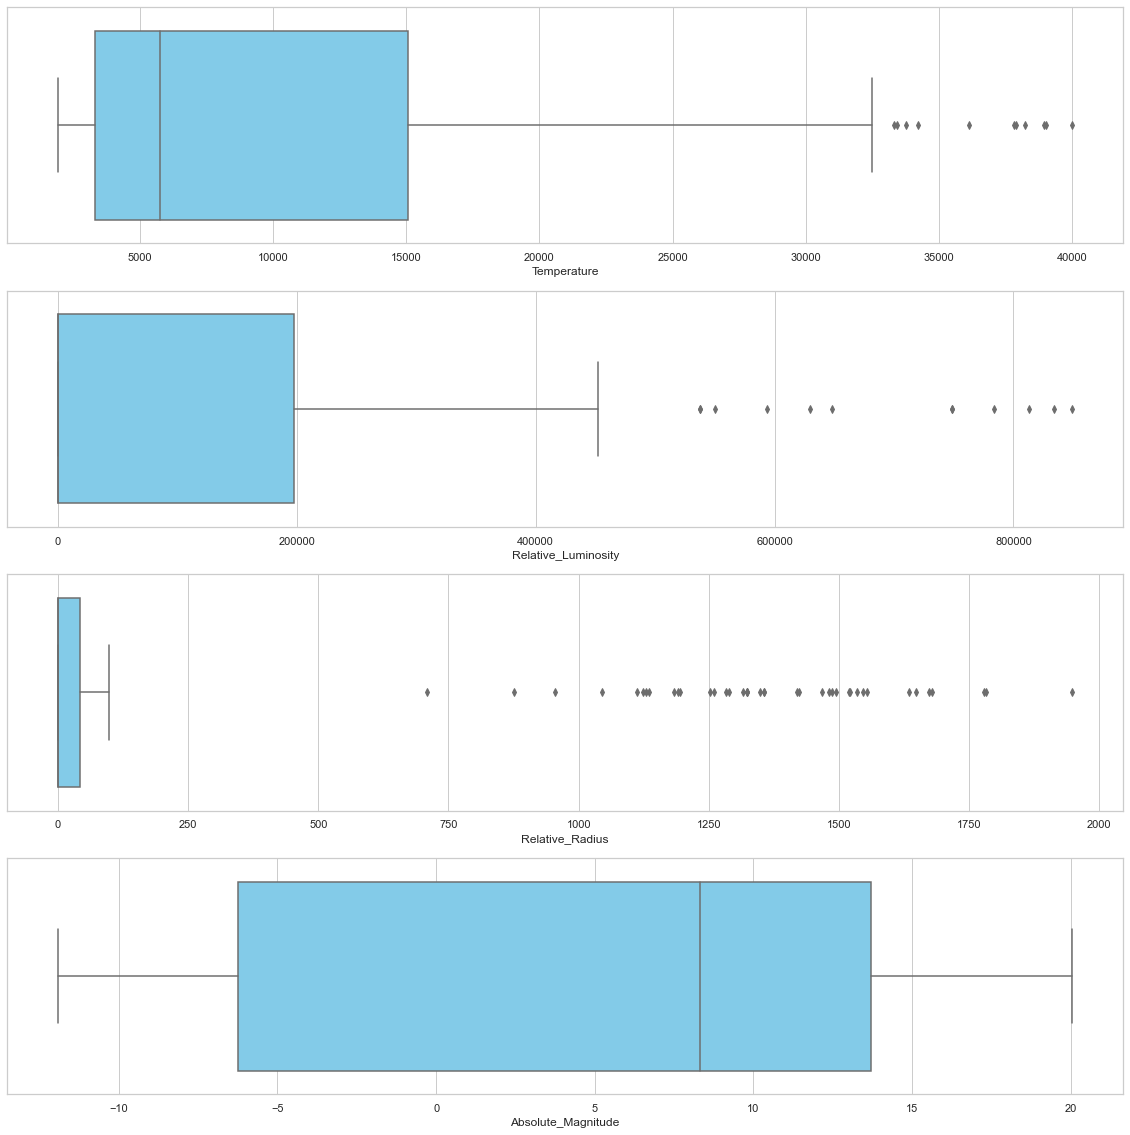

In [9]:
fig , axes = plt.subplots(4,1, figsize=(20, 20))
sns.set_theme(style="whitegrid")
[sns.boxplot(datafram[n], ax=axes[i] , color='#72d2f9') for i , n in enumerate (c_features)]

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

># convert color and Spectral_Class columns to numerical values

In [8]:
#convert color and Spectral_Class columns to numerical values
import sklearn
from sklearn.preprocessing import OrdinalEncoder
#data_cat_to_numerical
data_cat = data.iloc[: , [4 , 5]]
enc = OrdinalEncoder().fit(data_cat ).transform(data_cat )
data_frame_numerical = pd.DataFrame(enc)
data_frame_num_rename = data_frame_numerical.rename(columns= {0 : 'Color', 1: 'Spectral_Class' }) 
#concat
data_num = data.iloc[: , [0 , 1, 2, 3]]
data_cat = data.iloc[: , [4 , 5]]
datafram = pd.concat([data_num , data_frame_num_rename] , axis=1 ); datafram.head(5)

,Temperature,Relative_Luminosity,Relative_Radius,Absolute_Magnitude,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,8.0,5.0
1,3042,0.000500,0.1542,16.60,8.0,5.0
2,2600,0.000300,0.1020,18.70,8.0,5.0
3,2800,0.000200,0.1600,16.65,8.0,5.0
4,1939,0.000138,0.1030,20.06,8.0,5.0


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>### Correlation | heatmap Correlation and  Triangle Correlation Heatmap

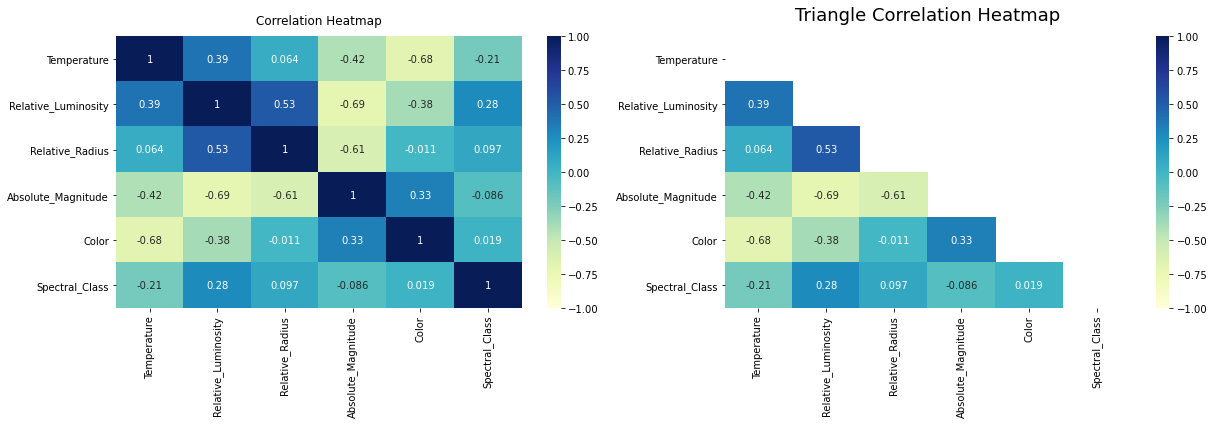

In [288]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
#heatmap corrolation
import seaborn as sns
heatmap = sns.heatmap(datafram.corr(), ax=axes[0] , vmin=-1, vmax=1, annot=True ,cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap' , fontdict={'fontsize':12}, pad=12);
# triangle corrolation
mask = np.triu(np.ones_like(datafram.corr(), dtype=np.bool))
heatmap = sns.heatmap(datafram.corr(),  vmin=-1, vmax=1, mask =mask , annot=True, cmap= "YlGnBu")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# result 2variables
### [Relative_Luminosity _ Absolute_Magnitude]  ----- [Relative_Luminosity _ Relative_Radius	] 
### [Relative_Luminosity _ Relative_Radius	]   ----- [Temperature _ Color	] 

<AxesSubplot:xlabel='Color'>

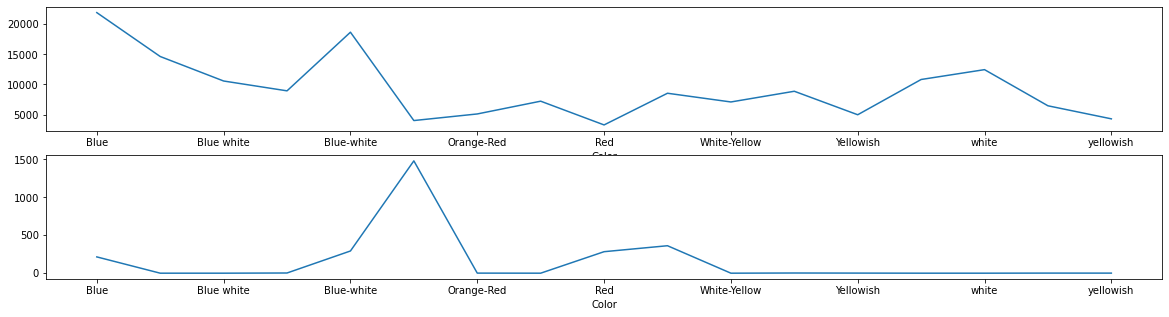

In [4]:
fig, axes = plt.subplots( 2,1, figsize=(20, 5))
data.groupby('Color').Temperature.mean().plot(ax=axes[0])
data.groupby('Color').Relative_Radius.mean().plot(ax=axes[1])

<AxesSubplot:xlabel='Temperature', ylabel='Relative_Luminosity'>

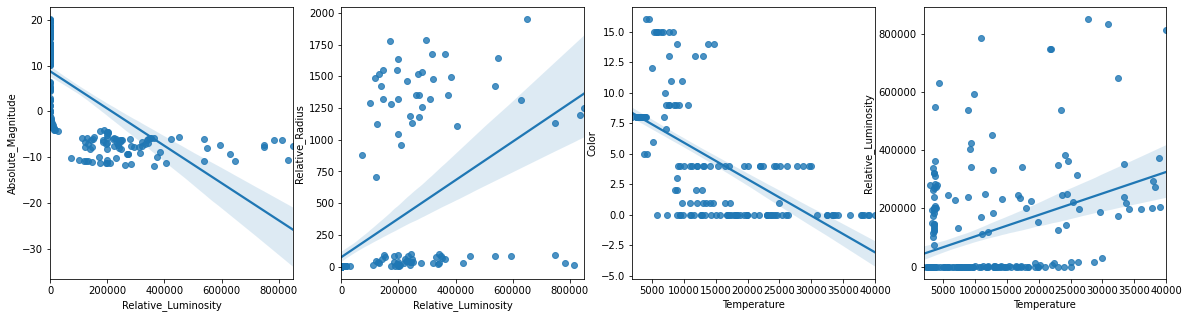

In [79]:
fig, axes = plt.subplots(1,4, figsize=(20, 5))
sns.regplot(x = datafram['Relative_Luminosity'] , y = datafram['Absolute_Magnitude'] ,ax=axes[0] )
sns.regplot(x = datafram['Relative_Luminosity'] , y = datafram['Relative_Radius'] ,ax=axes[1] )
sns.regplot(x = datafram['Temperature'] , y = datafram['Color'] ,ax=axes[2] )
sns.regplot(x = datafram['Temperature'] , y = datafram['Relative_Luminosity'] ,ax=axes[3] )

In [18]:
#? how do I conform real values color to coverting values color ؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟
datafram['Color'].value_counts()

8.0     112
0.0      56
4.0      26
1.0      10
15.0      8
9.0       7
2.0       4
14.0      3
13.0      3
11.0      2
5.0       2
16.0      2
6.0       1
7.0       1
10.0      1
12.0      1
3.0       1
Name: Color, dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

># to normalize befor I do use Algoritm

In [23]:
# [-1,+1] we have negetive values
def maximum_absolute_scaling(df):
    df_scaled = datafram.copy()
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled  
data_norm = maximum_absolute_scaling(datafram) ;data_norm

,Temperature,Relative_Luminosity,Relative_Radius,Absolute_Magnitude,Color,Spectral_Class
0,0.076700,2.825457e-09,0.000087,0.803589,0.5000,0.833333
1,0.076050,5.886370e-10,0.000079,0.827517,0.5000,0.833333
2,0.065000,3.531822e-10,0.000052,0.932203,0.5000,0.833333
3,0.070000,2.354548e-10,0.000082,0.830010,0.5000,0.833333
4,0.048475,1.624638e-10,0.000053,1.000000,0.5000,0.833333
...,...,...,...,...,...,...
235,0.973500,4.412776e-01,0.695920,-0.495015,0.0000,1.000000
236,0.770975,9.818959e-01,0.612779,-0.529910,0.0000,1.000000
237,0.220725,6.327765e-01,0.730305,-0.534895,0.5625,0.000000
238,0.230875,4.767253e-01,0.570695,-0.559821,0.5625,0.000000


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Algorithm KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(data_norm.iloc[: , :])
y = np.array(data['Target (star types)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn_cl = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
print("Train score : " , knn_cl.score(X_train, y_train))
print( "Test score : " , knn_cl.score(X_test, y_test))

Train score :  0.9888888888888889
Test score :  0.9666666666666667


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Algorithm linear (SVM)

In [25]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
l_svm = LinearSVC().fit(X_train, y_train)
print("Train score : " , l_svm .score(X_train, y_train))
print( "Test score : " , l_svm .score(X_test, y_test))

Train score :  0.95
Test score :  0.9833333333333333


-----------------------------------------------------------------------------------------------------------------------------------------------------------

# Algorithm  DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
d_tree = DecisionTreeClassifier(max_depth=4, random_state=2).fit(X_train, y_train)
print("Train Accuracy : ", d_tree.score(X_train, y_train))
print("Test Accuracy : ", d_tree.score(X_test, y_test))

Train Accuracy :  0.8444444444444444
Test Accuracy :  0.8


([<matplotlib.axis.YTick at 0xf94f4f0>,
 [Text(0, 0, 'Temperature'),
  Text(0, 1, 'Relative_Luminosity'),
  Text(0, 2, 'Relative_Radius'),
  Text(0, 3, 'Absolute_Magnitude'),
  Text(0, 4, 'Color'),
  Text(0, 5, 'Spectral_Class')])

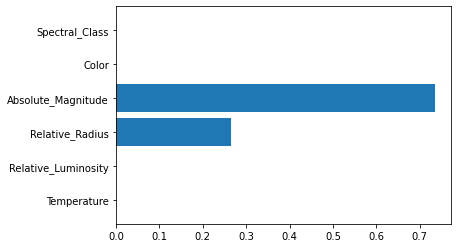

In [27]:
plt.barh(range(data_norm.iloc[: , :].shape[1]), d_tree.feature_importances_)
plt.yticks(range(data_norm.iloc[: , :].shape[1]), data_norm.columns)

Temperature            228
Relative_Luminosity    208
Relative_Radius        216
Absolute_Magnitude     228
Color                   17
Spectral_Class           7
Target                   6
dtype: int64


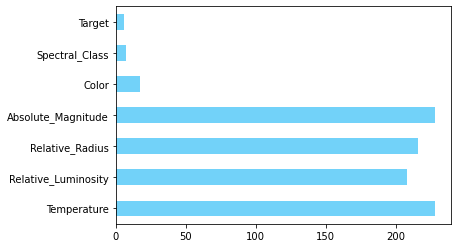

In [5]:
data.nunique().plot(kind='barh',color='#72d2f9')
print(data.nunique())

----------------------------------------------------------------------------------------------------------------------------------------------------------

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
rnd_forest = RandomForestClassifier(n_estimators=2, random_state=1).fit(X_train, y_train)
print("Train Accuracy : ", rnd_forest.score(X_train, y_train))
print("Test Accuracy : ", rnd_forest.score(X_test, y_test)) 

Train Accuracy :  0.9944444444444445
Test Accuracy :  0.9833333333333333


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# GradientBoosted

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
gb_clf = GradientBoostingClassifier(random_state=0, max_depth=20).fit(X_train, y_train)
print("Train Accuracy : ", gb_clf.score(X_train, y_train))
print("Test Accuracy : ", gb_clf.score(X_test, y_test))
# Ajib shod 

Train Accuracy :  1.0
Test Accuracy :  1.0


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [35]:
knn_cl = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
l_svm = LinearSVC().fit(X_train, y_train)
d_tree = DecisionTreeClassifier(max_depth=4, random_state=2).fit(X_train, y_train)
rnd_forest = RandomForestClassifier(n_estimators=2, random_state=1).fit(X_train, y_train)
gb_clf = GradientBoostingClassifier(random_state=0, max_depth=20).fit(X_train, y_train)
print('KNN')
print("Train score : " , knn_cl.score(X_train, y_train))
print( "Test score : " , knn_cl.score(X_test, y_test))
print('\n')

print('l_svm')
print("Train score : " , l_svm .score(X_train, y_train))
print( "Test score : " , l_svm .score(X_test, y_test))
print('\n')

print('d_tree')
print("Train Accuracy : ", d_tree.score(X_train, y_train))
print("Test Accuracy : ", d_tree.score(X_test, y_test))
print('\n')

print('rnd_forest')
print("Train Accuracy : ", rnd_forest.score(X_train, y_train))
print("Test Accuracy : ", rnd_forest.score(X_test, y_test))
print('\n')

print('gb_clf')
print("Train Accuracy : ", gb_clf.score(X_train, y_train))
print("Test Accuracy : ", gb_clf.score(X_test, y_test))
print('\n')



KNN
Train score :  0.9888888888888889
Test score :  0.9666666666666667


l_svm
Train score :  0.95
Test score :  0.9333333333333333


d_tree
Train Accuracy :  0.8444444444444444
Test Accuracy :  0.8


rnd_forest
Train Accuracy :  0.9944444444444445
Test Accuracy :  0.9833333333333333


gb_clf
Train Accuracy :  1.0
Test Accuracy :  1.0


